In [1]:
%pylab inline
from IPython.display import Audio

Populating the interactive namespace from numpy and matplotlib


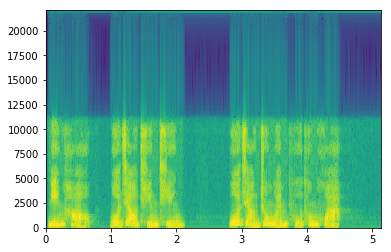

In [41]:
from scipy.signal import lfilter
filtered4 = lfilter([1],[1, 1], signal)
specgram(filtered4, Fs=44100);

##Biquad filters

$$H(z) = \frac{b_0z^{0} + b_1z^{-1} +  b_2z^{-2}}{ a_0z^{0} + a_1z^{-1} + a_2z^{-2}}$$

Great "cookbook":
[http://www.musicdsp.org/files/Audio-EQ-Cookbook.txt](http://www.musicdsp.org/files/Audio-EQ-Cookbook.txt)

In [42]:
# low shelf-filter

Fs = 44100
f0 = 10000.0
dBgain = 30.0
S = 1.0 # shelf slope
# -----------------------
A  = 10**(dBgain/40)

w0 = 2*pi*f0/Fs
alpha = sin(w0)/2 * sqrt( (A + 1/A)*(1/S - 1) + 2 ) 
       
b0 =    A*( (A+1) - (A-1)*cos(w0) + 2*sqrt(A)*alpha )
b1 =  2*A*( (A-1) - (A+1)*cos(w0)                   )
b2 =    A*( (A+1) - (A-1)*cos(w0) - 2*sqrt(A)*alpha )
a0 =        (A+1) + (A-1)*cos(w0) + 2*sqrt(A)*alpha
a1 =   -2*( (A-1) + (A+1)*cos(w0)                   )
a2 =        (A+1) + (A-1)*cos(w0) - 2*sqrt(A)*alpha

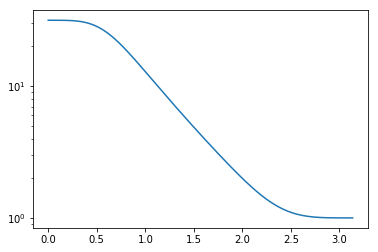

In [43]:
from scipy.signal import freqz
w, h = freqz([b0, b1, b2], [a0, a1, a2])
semilogy(w,abs(h))

In [44]:
from scipy.signal import iirdesign

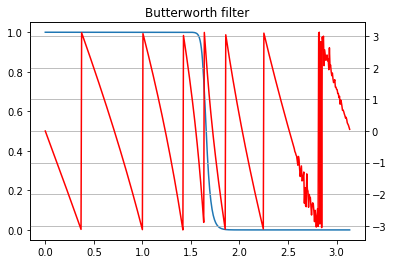

In [45]:
Wp = 0.5  # Cutoff frequency 
Ws = 0.6   # Stop frequency 
Rp = 0.1     # passband maximum loss (gpass)
As = 60      # stoppand min attenuation (gstop)
b,a = iirdesign(Wp, Ws, Rp, As, ftype='butter')
frq, resp = freqz(b,a)
plot(frq, abs(resp))
twinx()
plot(frq, angle(resp), 'r')

title('Butterworth filter')
grid()

More details and examples:
* http://nbviewer.ipython.org/github/mantaraya36/201A-ipython/blob/master/Audio%20Filters.ipynb

# Sonification/Simulation/Big Data

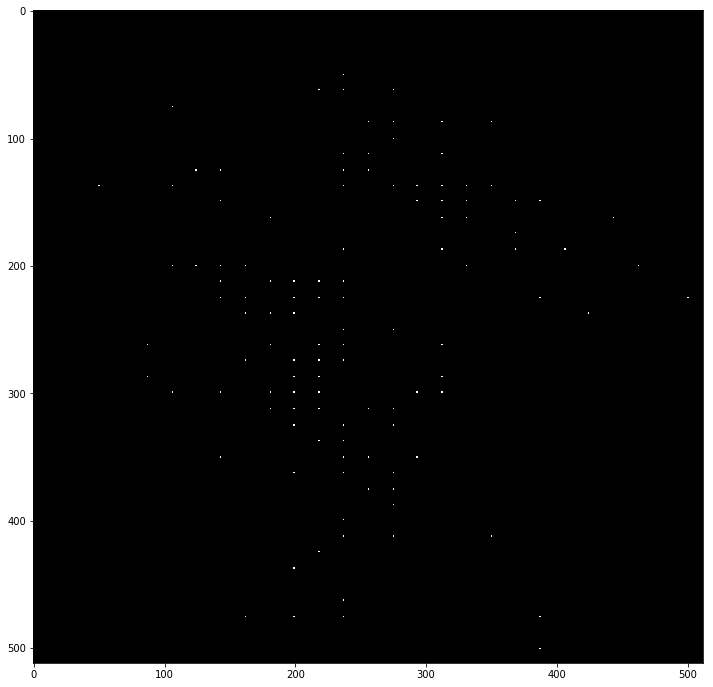

In [46]:
from sklearn import datasets

iris = datasets.load_iris()
index_0 = (iris.data[:,0] - iris.data[:,0].min())/ptp(iris.data[:,0])
index_1 = (iris.data[:,1] - iris.data[:,1].min())/ptp(iris.data[:,1])
space = zeros((512,512))

space[50 + (index_0*450).astype(int),50 + (index_1*450).astype(int)] += 1

imshow(space, cmap='gray', aspect='auto')
gcf().set_figheight(12)
gcf().set_figwidth(12)

You know what to do now, right?

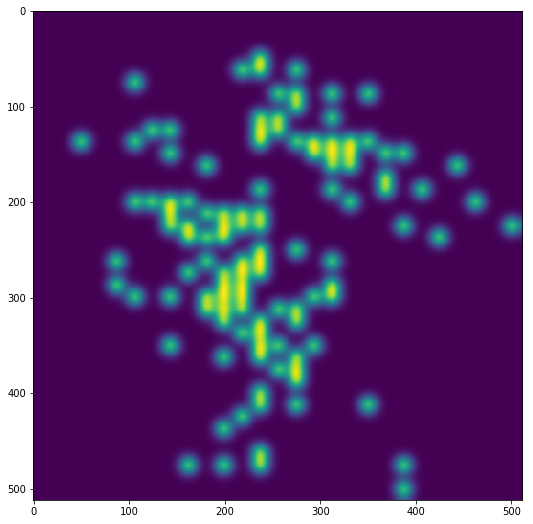

In [47]:
from scipy.ndimage.filters import gaussian_filter
gspace = gaussian_filter(space, 7)
imshow(gspace)

gcf().set_figheight(9)
gcf().set_figwidth(9)

In [48]:
Ex,Ey = gradient(gspace)

n = 35000
dt = 1e-1

r = zeros((n,2))
v = zeros((n,2))
a = zeros((n,2))

r[0] = [200, 300]
v[0] = [1.0, -1.0]

damp = 0.9999

q = 5500
m = 0.5

for i in range(n - 1):
    E = array([Ex[int(r[i][0]), int(r[i][1])], Ey[int(r[i][0]), int(r[i][1])]])

    a[i+1] = q*E/m 
    v[i+1] = damp * (v[i] + a[i+1]*dt)
    r[i+1] = r[i] + v[i+1]*dt


(0, 512)

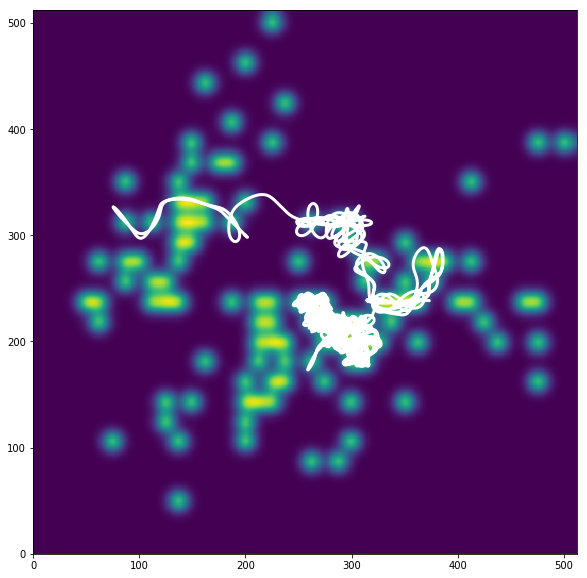

In [49]:
figure(figsize=(12,10))
imshow(gspace.T)
#quiver(Ex[::],Ey[::])
plot(*r.T, lw=3, c= 'w')
xlim((0, 512))
ylim((0, 512))

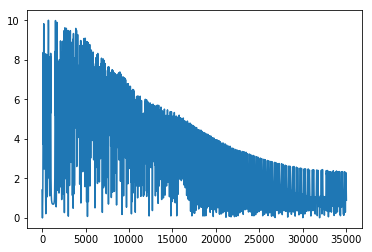

In [50]:
vel = hypot(*v.T)
plot(hypot(*v.T))

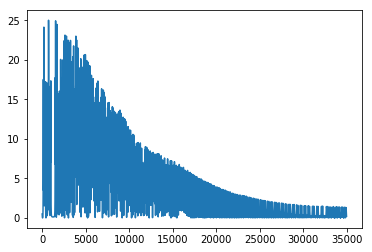

In [51]:
Ek = 0.5 * m * hypot(*v.T)**2
plot(Ek)

### This cell is out of service
```python
import icsound
ics = icsound.icsound()
ics.start_engine()
```

# Music Information Retrieval

Various excellent libraries are available for research related to MIR in Python:
* http://essentia.upf.edu/
* https://github.com/bmcfee/librosa
* https://github.com/marsyas/marsyas

Generic machine learning:
* http://shogun-toolbox.org/page/documentation/information
* http://scikit-learn.org/stable/

http://nbviewer.ipython.org/github/mantaraya36/240E-ipython/tree/master/

# By Andrés Cabrera mantaraya36@gmail.com

For course MAT 240A at UCSB

This ipython notebook is licensed under the CC-BY-NC-SA license: http://creativecommons.org/licenses/by-nc-sa/4.0/

![http://i.creativecommons.org/l/by-nc-sa/3.0/88x31.png](http://i.creativecommons.org/l/by-nc-sa/3.0/88x31.png)